<a href="https://colab.research.google.com/github/MiinJng/Test_ML/blob/main/1015_Machine_Learning_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 준비

In [ ]:
import pandas as pd

# 데이터 불러오기
titanic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

# 결측치 개수 확인
titanic.isnull().sum() # 891 컬럼 중 Age의 결측치는 177, Cabin의 결측치는 687, Embarked의 결측치는 2

# Age의 결측치는 평균치로 대체, Cabin은 결측치가 많으므로 입력 데이터에서 삭제
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

# Embarked는 결측치가 2이므로, 결측치가 있는 행 삭제
titanic['Embarked'].dropna(axis=0, inplace=True)

# Sex를 범주형 변수로 변환
titanic['Sex'] = titanic['Sex'].replace({'male': 0, 'female': 1}).astype(int)


# 2. 상관관계 확인

<ipython-input-2-8f2278aa70fd>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic.corr().round(1)


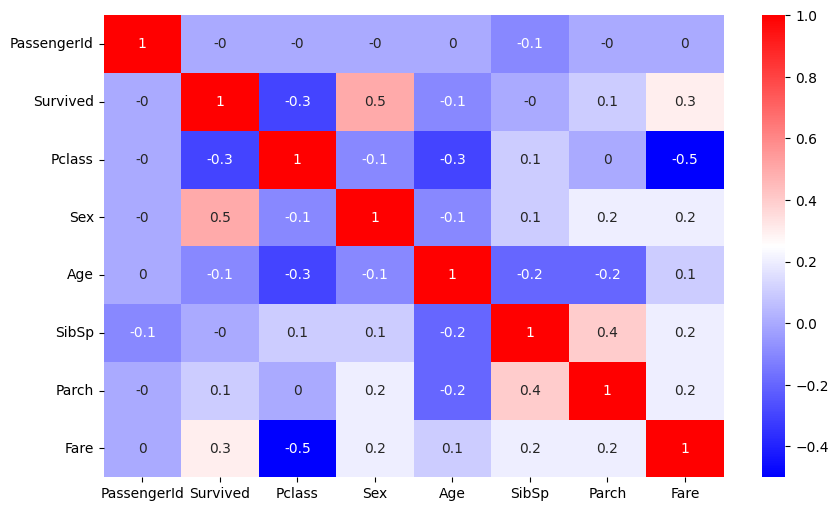

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = titanic.corr().round(1)
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')
plt.show()

# 3. 입력 데이터와 정답 데이터 생성

In [ ]:
# PassengerId, Name, Ticket, Embarked를 제외한 입력 데이터 생성
titanic_input = titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex']].to_numpy()
titanic_target = titanic['Survived'].to_numpy()

# 4. 훈련 세트와 테스트 세트로 나누기

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    titanic_input, titanic_target, random_state = 201933036
)

# 5. 특성 공학

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures 객체 생성
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)

# train 세트와 test 세트를 변환
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 특성이 각각 어떤 조합으로 만들어졌는지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x0^2', 'x0 x1', 'x0 x2',
       'x0 x3', 'x0 x4', 'x0 x5', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4',
       'x1 x5', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x3^2', 'x3 x4',
       'x3 x5', 'x4^2', 'x4 x5', 'x5^2'], dtype=object)

# 6. 표준화 전처리

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# [SGD Classifier]

In [ ]:
from sklearn.linear_model import SGDClassifier
import numpy as np

# SGDClassifier 객체 생성
sc = SGDClassifier(loss = 'log', max_iter=10, random_state = 201933036)

# 모델 훈련 및 훈련 세트 정확도 출력
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))

0.7949101796407185


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


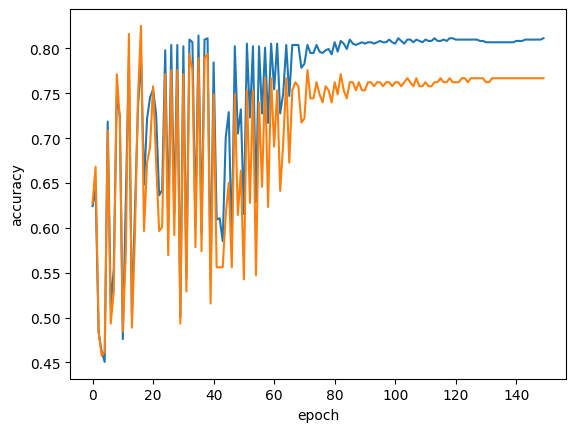

In [ ]:
# ---- 적절한 에포크 횟수 구하기 ---
sc = SGDClassifier(loss = 'log', random_state = 201933036)

# 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트 준비
train_score = []
test_score = []
classes = np.unique(train_target)

# 150번의 에포크 동안 훈련을 반복하여 진행
for _ in range(0, 150):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

# 150번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# epoch 수를 120에 맞추고 모델 다시 훈련
sc = SGDClassifier(loss = 'log', max_iter = 120, tol=None, random_state = 201933036)
sc.fit(train_scaled, train_target)

# 훈련 세트와 테스트 세트 성능을 확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8158682634730539
0.8071748878923767


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


# [Decision Tree]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# 하이퍼파라미터 튜닝
params = {'min_impurity_decrease' : uniform(0.0001, 0.0001),
          'max_depth' : randint(20,40),
          'min_samples_split' : randint(2, 25),
          'min_samples_leaf' : randint(1, 30)}

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 201933036), params, n_iter=100, n_jobs=-1, random_state = 201933036)

# 결정 트리는 표준화 전처리를 할 필요가 없으므로, 전처리 하기 전의 훈련 세트와 테스트 세트로 결정 트리 모델을 훈련
gs.fit(train_poly, train_target)

# 최적의 매개변수 조합 출력
print(gs.best_params_)

# 최고의 교차 검증 점수
print(np.max(gs.cv_results_['mean_test_score']))

# 이 모델을 최종 모델로 결정 후 훈련 세트와 테스트 세트 성능을 확인
dt = gs.best_estimator_
print(dt.score(train_poly, train_target))
print(dt.score(test_poly, test_target))

{'max_depth': 33, 'min_impurity_decrease': 0.00017360717390664342, 'min_samples_leaf': 19, 'min_samples_split': 7}
0.8098866569408596
0.844311377245509
0.8295964125560538


# [Random Forest]

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 객체 생성
rf = RandomForestClassifier(n_jobs=-1, random_state=201933036)

# 교차 검증 수행
scores = cross_validate(rf, train_poly, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 훈련 세트와 검증 세트의 차이가 클 경우 매개변수 조정

0.9865252546466449 0.8069015823139939


In [ ]:
# 매개변수 조정 - 그리드 서치
from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),
          'max_depth' : range(5, 20, 1),
          'min_samples_split' : range(5, 100, 10) }
gs = GridSearchCV(RandomForestClassifier(random_state=201933036), params, n_jobs=-1)
gs.fit(train_poly, train_target)
print(gs.best_params_)

{'max_depth': 11, 'min_impurity_decrease': 0.0001, 'min_samples_split': 5}


In [ ]:
# 최상의 교차 검증 점수
print(np.max(gs.cv_results_['mean_test_score']))

# 훈련 세트와 테스트 세트 성능을 확인
rf = gs.best_estimator_
print(rf.score(train_poly, train_target))
print(rf.score(test_poly, test_target))

0.8278195488721805
0.9311377245508982
0.8385650224215246


# [Histogram-based Gradient Boosting]

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

# HistGradinetBoostingClassifier 객체 생성
hgb = HistGradientBoostingClassifier(random_state=201933036)

# 교차 검증 수행
scores = cross_validate(hgb, train_poly, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 특성 중요도 출력
from sklearn.inspection import permutation_importance

hgb.fit(train_poly, train_target)
result = permutation_importance(hgb, train_poly, train_target, n_repeats=10, random_state=201933036, n_jobs=-1)
print(result.importances_mean)

# 훈련 세트와 검증 세트의 차이가 클 경우 매개변수 조정

0.9805369456403794 0.8023903041185052
[ 0.01482036  0.04775449  0.         -0.0001497   0.04550898  0.
  0.          0.0747006   0.0008982   0.0007485   0.04386228  0.0001497
  0.          0.01616766  0.00763473  0.06601796  0.08218563  0.
  0.00299401  0.03308383  0.          0.          0.00793413  0.00179641
  0.          0.13383234  0.        ]


In [ ]:
# 매개변수 조정 - 그리드 서치
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : range(5, 20, 1),
          'min_samples_leaf' : range(2, 100, 10)}
gs = GridSearchCV(HistGradientBoostingClassifier(random_state=201933036), params, n_jobs=-1)
gs.fit(train_poly, train_target)
print(gs.best_params_)

{'max_depth': 10, 'min_samples_leaf': 32}


In [ ]:
# 최상의 교차 검증 점수
print(np.max(gs.cv_results_['mean_test_score']))

# 훈련 세트와 테스트 세트 성능을 확인
rf = gs.best_estimator_
print(rf.score(train_poly, train_target))
print(rf.score(test_poly, test_target))

0.8278419930423071
0.9446107784431138
0.8430493273542601
